# Project 1: Prediction of PV-production


Group 1: Thomas Habisch, Patrick Haslinger, Ivo Sabor, Katharina Sommer, Stefan Still, Michael Szabo


### Introduction

Electricity production by photovoltaic installations plays an important role in worlds energy market. As solar energy is a clean and sustainable source, and its harvesting is in comparison to large scale production facilities quite easy and cheap. Photovoltaic panels can be installed at nearly every place, without the requirement of operational staff or other large auxiliary installations, making it an ideal solution also for private electricity production. On the other side, the energy production of photovoltaic installations cannot be actively controlled or changed but is directly dependent on the solar irradiation at the locality of the solar panel. <p>
In order to enable the operation of a stable and efficient electric grid a prediction of the energy produced is needed in order to plan the energy transmission on larger scale.<p>
In this project different Machine learning algorithms are used in order to create such a prediction of the electric output of the PV installation at the FH Joanneum in Kapfenberg. The PV-panels used for this study are fix mounted and do not track the movement of the sun.


## Initial Data

To predict the energy production of the PV installation at the FH Joanneum the real production of the installation in the time between the 17th of September and the 2nd of December was linked to the weather data of this time period. Due to data errors at the beginning of the data recording this time slot had finally to be reduced to the time between the 22nd of September and the 2nd of December.

### Production Data
The data about the production of the installation was directly received from the operation FH Joanneum, proving a trustworthy and detailed data. The received data set has contained two electrical output values, as the installation at FH Joanneum in Kapfenberg has two inverters. As both values directly correlate a sum value of both inverters was used to train the machine learning algorithm.
The data set did contain some gaps were the data collection by the PV background system obviously failed.

Furthermore, offsets of the collected data (shifts of minute of recording) were manually corrected in order to make the time stamps of the production data set compatible to the weather data. 

### Weather Data
The only available weather data was purchased from https://openweathermap.org/ . Unfortunately, though being a paid service, the resolution of the weather data was only available with an hourly interval meaning the resolution of the prediction had to be set also to one hour.


## Preperation of machine learning modells



### Importing relevant data

As for the first step in creating the models the cleaned and standardized data was imported to the file. 
After a closer examination of the data the most promising variables for the prediction were defined as
- "Timestamp Numerical" as a continuous timestamp
- "daytime" for the hourly daytime (repeating every day) as value between 0 and 23
- "temp" for the real temperature in Kelvin to avoid negative values
- "feels_like" for the perceived temperature ("wind chill") in Kelvin
- "temp_min" for the minimum temperature (in Kelvin) in the region
- "temp_max" for the maximum temperature (in Kelvin) in the region
- "humidity" for the humidity in Percent
- "wind_speed" for the wind speed in meter per second
- "clouds_all" for the percentage of sky covered in clouds

This selection was done in order to reduce the necessary computing power, which otherwise would have caused program failures on some of the computers used.


### First analysis of correlation
As a next step the seaborn sns.pairplot function was used for a first optical analysis of correlating factors. The plot can be seen below:

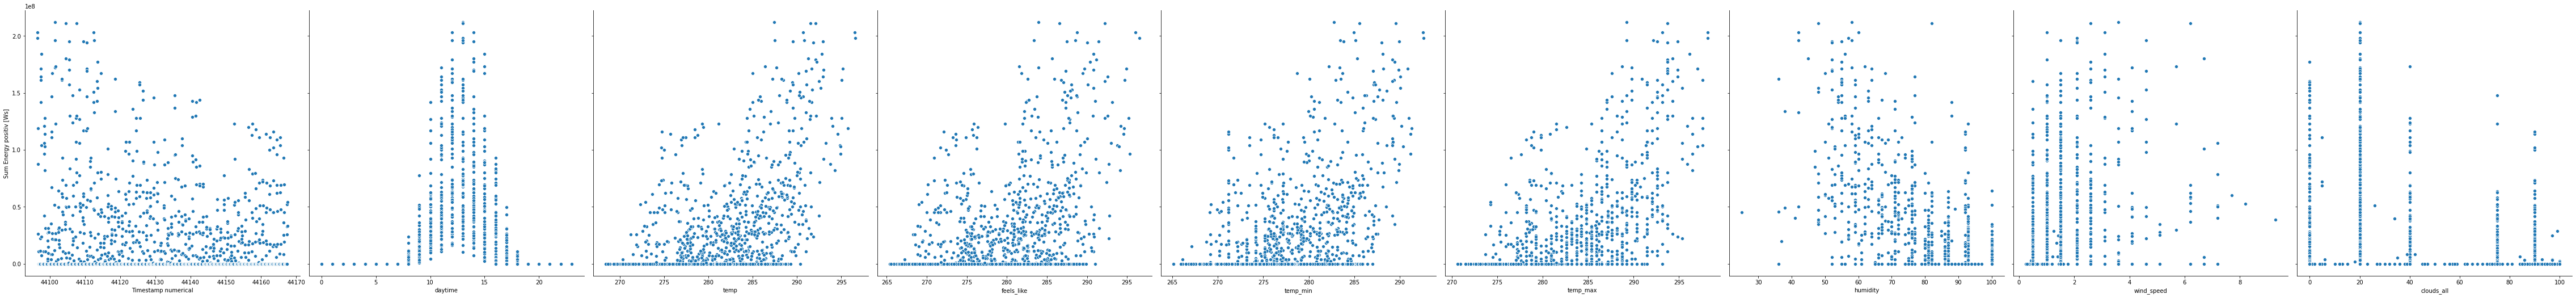

As expected, there are only lose correlations observable with naked eye. The clearest and also only really expected correlation can be seen in the second graph, where the daytime is correlated with the amount of energy produced. It can clearly be seen that the highest energy output is achieved at noon, while the energy output declines towards morning and evening. During night times no energy is produced.

### Splitting up the test and training data

In order to split up the data set into a training data set and a test data set the sklearn.model_selection tool was used. The test set size was defined as 10% of the data with a randomness state of 42. This low percentage of test data is reasoned by the small size of initial data set.

# Results of the models

In this chapter the results of the models are presented. To assess the results of the different models three statistical values are used:

- The R² (coefficient of determination)
- The RSME (Mean Squared Error)
- The MAE (Mean Absolute Error)

The success of each method will be mainly determined by the coefficient of determination. The ideal result of this value is 1. The lower the score result is, the lower the effectivity of the model.

For the models the following functions are used with default variable settings (unless stated otherwise):

- Linear regresion (from sklearn.linear_model import LinearRegression)
- Ridge (from sklearn.linear_model import Ridge)
- DecisionTree (from sklearn import tree)
- RandomForestRegressor (from sklearn.ensemble import RandomForestRegressor)
- RandomForestRegressor with feature scaling (StandardScaler)
- Neural-Network: MLP Classifier (from sklearn.neural_network import MLPClassifier)
- Neural-Network: MLP Regressor (from sklearn.neural_network import MLPRegressor)
- Vector regression (from sklearn.svm import SVR)



## Linear regression
LinearRegression fits a linear model with coefficients
to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.[1]

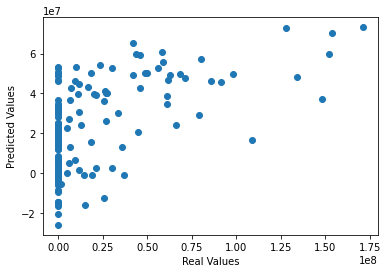

The R²-score is 0.3018790229771653<p>
The RMSE is 28430413.604283974<p>
The MAE is 20526619.559292067<p>
Remarkably this model predicts a negative energy output. A result not possible in reality. An explanation for this would be the linear extrapolation of test values that exceeded all values in the training set. For many values of the weather data is no threshold defined meaning they can exceed the range of the training data, while the model does not know that no negative output of the PV installation is possible.


## Ridge
Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients.[1] The complexity parameter alpha controls the amount of shrinkage: the larger the value of alpha, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity. The used alpha-coefficient is 0.5 .

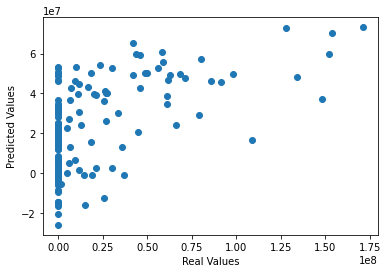

The R²-score is 0.30188003282238296<p>
The RMSE is 28430393.04171062<p>
The MAE is 20526558.651551936
    
Like at the linear regression modell, again a negative output is predicted in some situations, probably again tracable back to a linear correlation in the modell.

## DecisionTree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.[2]

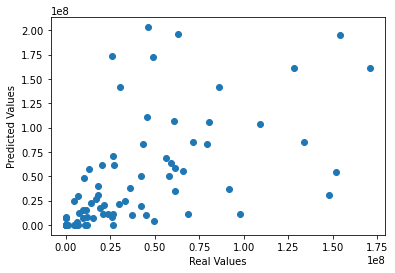

The R²-score is 0.1726923740841747<p>
The RMSE is 30949336.840034146<p>
The MAE is 12702659.649122806


## Random Forest Regressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.[3]

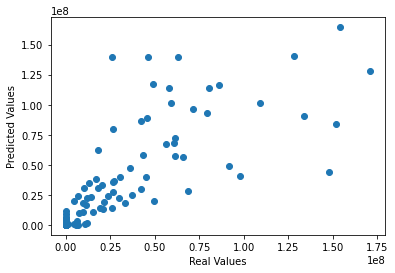

The R²-score is 0.5928398045364862<p>
The RMSE is 21712033.03097096<p>
The MAE is 9494478.099415205

## Random Forest Regressor with feature scaling
Here again the Random Forrest Regressor is used, but the inital data are standardized.
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). [4]

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. [4]

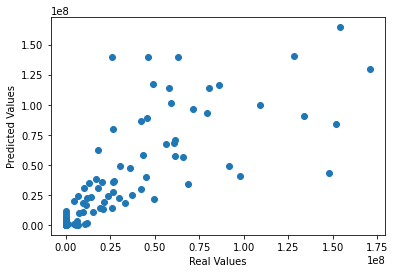

The R²-score is 0.5942861996955524<p>
The RMSE is 21673433.82664533<p>
The MAE is 9511413.771929825

## Multi-layer Perceptron (MLP)
Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function by training on a dataset. Given a set of features and a target, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one hidden layer MLP with scalar output. [6]

### Neural-network: MLP Classifier
Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.[6]

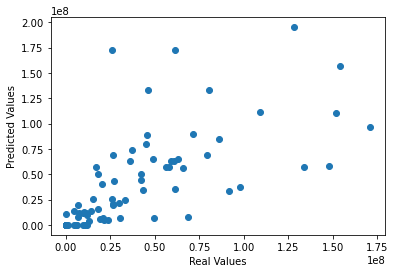

The R²-score is 0.5083706331342611<p>
The RMSE is 23858148.77520886<p>
The MAE is 9454059.649122806



### Neural-network: MLP Regressor
Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values. [6]

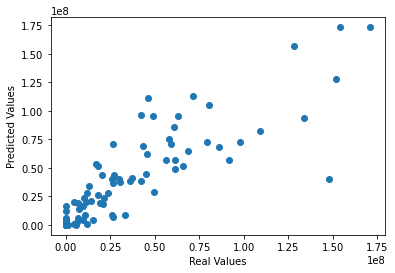

The R²-score is 0.7825000030940515<p>
The RMSE is 15868923.315793196<p>
The MAE is 7477200.30262601



## Vector Regression
Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.[7]

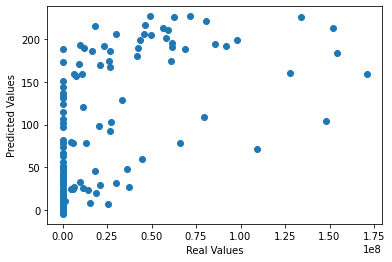

The R²-score is -0.2777817597996839 <p>
The RMSE is 38463267.57028099<p>
The MAE is 17933816.76161801<p>


The support vector regression results in completely ridiculous predictions. The values of this model are so far off from realistic that it can be called an absolute failure!



# Conclusion

The used machine learning models did deliver varying results. Although far from being perfect, the results do show that the trainings were successful, and the predicted results are located in a realistic area.
The most accurate algorithm was the MLP Regressor delivering an R² value of 78%. <p>
Due to the very limited initial data set (only hourly weather data and only 3 months of data) a higher resolution resulting in a more detailed and informative outcome could not be achieved. As the used data only contains information about the months September, October, November and December a whole-year prediction model could not be established as the variation of day lengths is not supported enough by the available data.

## References
[1] https://scikit-learn.org/stable/modules/linear_model.html

[2] https://scikit-learn.org/stable/modules/tree.html

[3] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn.preprocessing.StandardScaler.fit

[5] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

[6] https://scikit-learn.org/stable/modules/neural_networks_supervised.html

[7] https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation